## 데이터 로드 및 전처리

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping ,LearningRateScheduler
from tensorflow.keras.layers import BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np

# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=2023)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_val = x_val.reshape(x_val.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


## 모델 정의

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

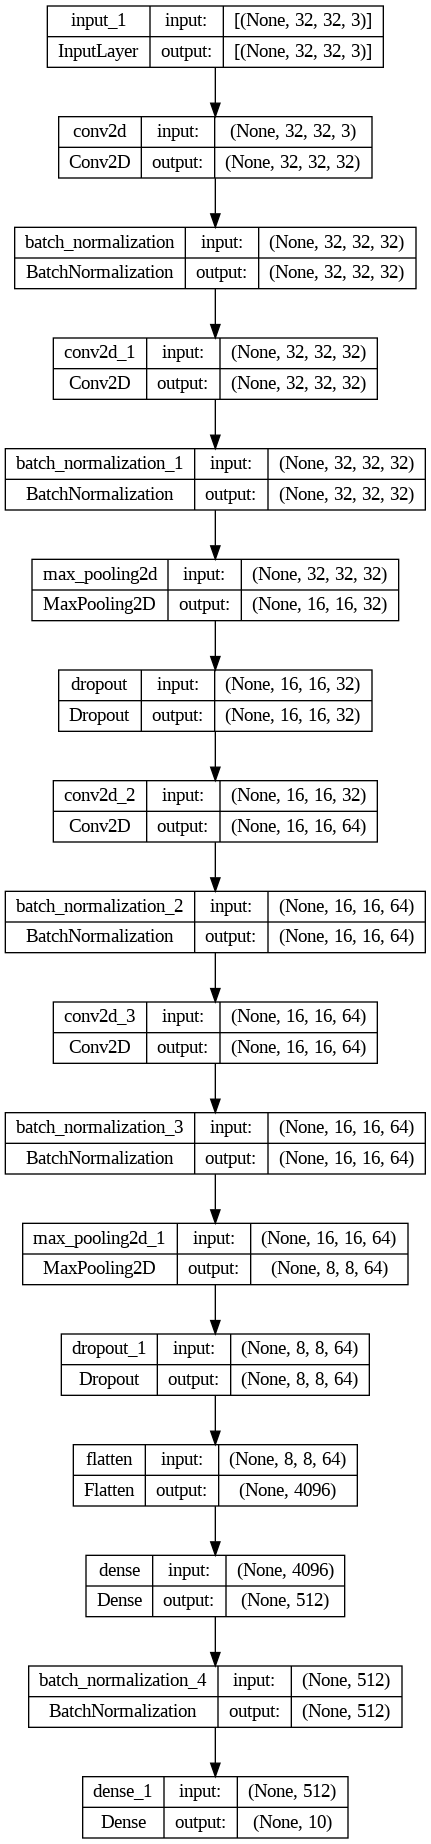

In [2]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 이미지 분류 모델을 구성합니다.
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
							metrics=['accuracy'])

# 모델의 구조를 확인합니다.
model.summary()

from tensorflow.keras import utils
utils.plot_model(model, show_shapes=True)

## 학습

In [3]:
# 모델 학습
# ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
def lr_scheduler(epoch):
    if epoch < 20:
        return 0.001
    elif epoch < 40:
        return 0.0005
    else:
        return 0.0001

lr_schedule = LearningRateScheduler(lambda epoch: lr_scheduler(epoch))

checkpoint_cb = ModelCheckpoint("cifar10_model_init",
                                monitor="val_loss",
                                save_best_only=True)

early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=50, batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping, lr_schedule])

Epoch 1/50
625/625 [==============================] - 263s 406ms/step - loss: 1.3359 - accuracy: 0.5382 - val_loss: 1.0952 - val_accuracy: 0.6103 - lr: 0.0010
Epoch 2/50
625/625 [==============================] - 245s 393ms/step - loss: 0.8969 - accuracy: 0.6834 - val_loss: 1.0905 - val_accuracy: 0.6265 - lr: 0.0010
Epoch 3/50
625/625 [==============================] - 245s 392ms/step - loss: 0.7317 - accuracy: 0.7439 - val_loss: 1.2761 - val_accuracy: 0.6208 - lr: 0.0010
Epoch 4/50
625/625 [==============================] - 241s 385ms/step - loss: 0.6112 - accuracy: 0.7846 - val_loss: 0.7312 - val_accuracy: 0.7525 - lr: 0.0010
Epoch 5/50
625/625 [==============================] - 244s 390ms/step - loss: 0.4995 - accuracy: 0.8260 - val_loss: 0.8315 - val_accuracy: 0.7252 - lr: 0.0010
Epoch 6/50
625/625 [==============================] - 243s 389ms/step - loss: 0.4051 - accuracy: 0.8594 - val_loss: 0.9966 - val_accuracy: 0.7134 - lr: 0.0010
Epoch 7/50
625/625 [==========================

## 결과 및 평가

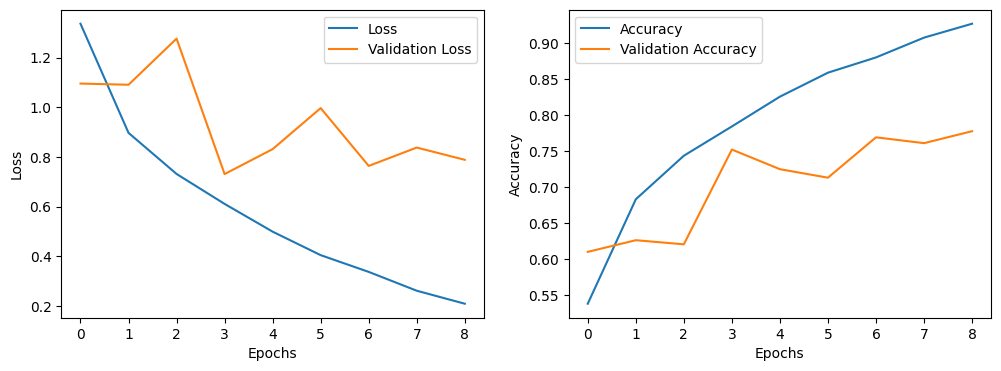

313/313 [==============================] - 15s 49ms/step - loss: 0.7523 - accuracy: 0.7403


In [4]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

# 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_accuracy = model.evaluate(x_test, y_test)